<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/Klasifikasi_PKH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library


In [1]:
#import Library
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

#Load Dataset


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Categories=['Penrima_manfaat','Tidak_menerima']

flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/klasifikasiPkh'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Penrima_manfaat
loaded category:Penrima_manfaat successfully
loading... category : Tidak_menerima
loaded category:Tidak_menerima successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.884000,0.999238,0.982432,0.880311,0.999754,0.979639,0.873636,0.999830,0.977642,0.870783,...,0.634816,0.562271,0.473289,0.777994,0.696558,0.589608,0.854169,0.772646,0.658805,0
1,0.663869,0.696736,0.697105,0.730128,0.762394,0.742904,0.765625,0.803436,0.773164,0.765067,...,0.889732,0.809809,0.712987,0.889460,0.809887,0.712673,0.887463,0.804773,0.708828,0
2,0.830912,0.899186,0.954806,0.755369,0.840493,0.914781,0.732669,0.825228,0.906942,0.753576,...,0.747529,0.671526,0.514133,0.733588,0.657501,0.498345,0.729374,0.653969,0.494380,0
3,0.824355,0.948813,0.985885,0.822785,0.949501,0.991951,0.828022,0.953652,0.994805,0.821048,...,0.100297,0.099701,0.118960,0.097001,0.098783,0.117100,0.119562,0.121777,0.143140,0
4,0.459281,0.433525,0.339935,0.484092,0.457623,0.360755,0.483199,0.463628,0.368423,0.462964,...,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.691672,0.676270,0.678280,0.759442,0.745011,0.747021,0.902567,0.890013,0.892002,0.578751,...,0.451750,0.458654,0.417742,0.478568,0.486122,0.439451,0.486071,0.493885,0.446123,1
436,0.135582,0.140140,0.089855,0.271973,0.281624,0.225841,0.120251,0.132957,0.066478,0.157748,...,0.304121,0.190617,0.024583,0.420366,0.310532,0.128382,0.444665,0.336984,0.154816,1
437,0.765029,0.847382,0.961108,0.765031,0.847384,0.961109,0.765516,0.847869,0.961594,0.768141,...,0.382888,0.331852,0.177578,0.488264,0.422969,0.206625,0.395843,0.350792,0.149546,1
438,0.862743,0.881942,0.930228,0.862743,0.879963,0.934577,0.862743,0.878431,0.938502,0.862743,...,0.539593,0.562595,0.420155,0.381238,0.399669,0.289555,0.158480,0.173074,0.084213,1


#Spliting Data dan Data Training

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Pemisahan Berhasil')

Spliting Successfully


In [8]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

352
88
352
88


#Train Model SVM

In [10]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("Mulai mentraining data, tunggu beberapa saat")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('Model dilatih dengan baik dengan gambar yang diberikan')
model.best_params_

Mulai mentraining data, tunggu beberapa saat
Model dilatih dengan baik dengan gambar yang diberikan


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

#Prediksi Data

In [11]:
y_pred=model.predict(x_test)
print("Data yang diprediksi adalah :")
y_pred

Data yang diprediksi adalah :


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [12]:
print("Data sebenarnya adalah:")
np.array(y_test)

The actual data is:


array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

#Cek Akurasi

In [13]:
#classification_report(y_pred,y_test)
print(f"Modelnya adalah {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

Modelnya adalah 94.31818181818183% accurate


#Menggunakan Pickle untuk menyimpan Model ke disk

In [14]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


#Testing Model

Enter URL of Image/content/rumah ua.jpg


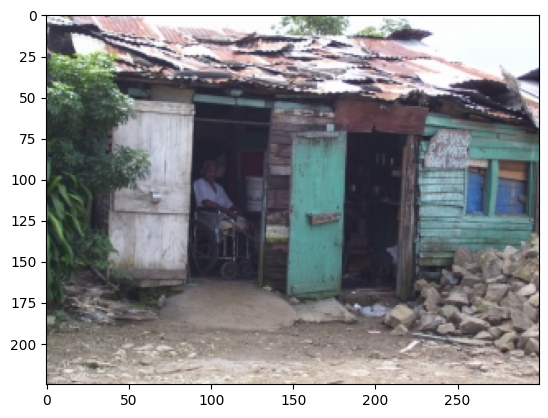

Penrima_manfaat = 88.22198331621189%
Tidak_menerima = 11.77801668378809%
The predicted image is : Penrima_manfaat
Is the image a Penrima_manfaat ?(y/n)
y
Thank you for your feedback


In [18]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Harap tunggu beberapa saat hingga model belajar dari gambar ini :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")